In [0]:
from google.colab import files
%tensorflow_version 1.x

TensorFlow 1.x selected.


In [0]:
# Install Kaggle library
!pip install -q kaggle

In [0]:
# Upload kaggle API key file
uploaded = files.upload()

Saving kaggle.json to kaggle.json


In [0]:
!cp kaggle.json ~/.kaggle/

In [0]:
!kaggle datasets download -d emmarex/plantdisease

 99% 651M/658M [00:20<00:00, 53.7MB/s]
100% 658M/658M [00:20<00:00, 34.2MB/s]


In [0]:
%%capture
!unzip plantdisease.zip

In [0]:
!ls

kaggle.json  plantdisease.zip  plantvillage  PlantVillage  sample_data


In [0]:
!ls PlantVillage

Pepper__bell___Bacterial_spot  Tomato_Late_blight
Pepper__bell___healthy	       Tomato_Leaf_Mold
Potato___Early_blight	       Tomato_Septoria_leaf_spot
Potato___healthy	       Tomato_Spider_mites_Two_spotted_spider_mite
Potato___Late_blight	       Tomato__Target_Spot
Tomato_Bacterial_spot	       Tomato__Tomato_mosaic_virus
Tomato_Early_blight	       Tomato__Tomato_YellowLeaf__Curl_Virus
Tomato_healthy


In [0]:
!ls plantvillage

PlantVillage


In [0]:
import os
folders = os.listdir("PlantVillage")
print(folders)

['Tomato_healthy', 'Tomato__Tomato_mosaic_virus', 'Potato___Early_blight', 'Tomato_Leaf_Mold', 'Tomato_Early_blight', 'Pepper__bell___healthy', 'Tomato_Bacterial_spot', 'Tomato_Late_blight', 'Tomato__Tomato_YellowLeaf__Curl_Virus', 'Pepper__bell___Bacterial_spot', 'Potato___healthy', 'Potato___Late_blight', 'Tomato__Target_Spot', 'Tomato_Septoria_leaf_spot', 'Tomato_Spider_mites_Two_spotted_spider_mite']


In [0]:
from keras.preprocessing.image import ImageDataGenerator

train_gen = ImageDataGenerator(rescale = 1.0/255)

train_generator = train_gen.flow_from_directory("PlantVillage", target_size = (224,224), batch_size = 64, class_mode = "categorical", shuffle = True)


Using TensorFlow backend.


Found 20638 images belonging to 15 classes.


# New Section

In [0]:
train_generator.labels

array([ 0,  0,  0, ..., 14, 14, 14], dtype=int32)

In [0]:
x, y = train_generator.next()
print(x.shape)
print(y.shape)

(64, 224, 224, 3)
(64, 15)


In [0]:
from keras.applications.resnet50 import ResNet50
from keras.optimizers import Adam
from keras.layers import *
from keras.models import Model


In [0]:
model = ResNet50(include_top =False, weights = "imagenet", input_shape = (224,224,3))

/usr/local/lib/python3.6/dist-packages/keras_applications/resnet50.py:265: UserWarning: The output shape of `ResNet50(include_top=False)` has been changed since Keras 2.2.0.
  warnings.warn('The output shape of `ResNet50(include_top=False)` '


94658560/94653016 [==============================] - 1s 0us/step


In [0]:
av1 = GlobalAveragePooling2D()(model.output)
fc1 = Dense(256 , activation = "relu")(av1)
d1 = Dropout(0.4)(fc1)
fc2 = Dense(15 , activation= "softmax")(d1)

model_new = Model(input = model.input, output = fc2)


Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:6: UserWarning: Update your `Model` call to the Keras 2 API: `Model(inputs=Tensor("in..., outputs=Tensor("de...)`
  


In [0]:
adam = Adam(lr = 0.00003)
model_new.compile(loss = "categorical_crossentropy", optimizer ="adam", metrics = ["accuracy"] )

In [0]:
for ix in range(169):
    model_new.layers[ix].trainable = False
model_new.compile(loss = "categorical_crossentropy", optimizer ="adam", metrics = ["accuracy"] )


In [0]:
hist = model_new.fit_generator(train_generator, epochs = 25, steps_per_epoch= 325)

model_new.save("CropAI_model_train_gen_epoch_5.h5")
print("model weights are save on disk")

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


Epoch 1/25
325/325 [==============================] - 49s 152ms/step - loss: 0.4329 - acc: 0.8626
Epoch 2/25
325/325 [==============================] - 41s 126ms/step - loss: 0.1355 - acc: 0.9572
Epoch 3/25
325/325 [==============================] - 41s 125ms/step - loss: 0.0836 - acc: 0.9726
Epoch 4/25
325/325 [==============================] - 41s 126ms/step - loss: 0.0534 - acc: 0.9830
Epoch 5/25
325/325 [==============================] - 41s 125ms/step - loss: 0.0409 - acc: 0.9866
Epoch 6/25
325/325 [==============================] - 41s 126ms/step - loss: 0.0329 - acc: 0.9889
Epoch 7/25
325/325 [==============================] - 41s 126ms/step - loss: 0.0285 - acc: 0.9905
Epoch 8/25
325/325 [==============================] - 41s 126ms/step - loss: 0.0317 - acc: 0.9899
Epoch 9/25
325/325 [==============================] - 41s 125ms/step - loss: 0.0282 - acc: 0.9904
Epoch 10/25
325/325 [=

In [0]:
from keras.preprocessing import image
import matplotlib.pyplot as plt
import numpy as np
import os


def load_image(img_path, show=False):

    img = image.load_img(img_path, target_size=(224, 224))
    img_tensor = image.img_to_array(img)                    # (height, width, channels)
    img_tensor = np.expand_dims(img_tensor, axis=0)         # (1, height, width, channels), add a dimension because the model expects this shape: (batch_size, height, width, channels)
    img_tensor /= 255.                                      # imshow expects values in the range [0, 1]

    plt.imshow(img_tensor[0])                           
    plt.axis('off')
    plt.show()

    return img_tensor

In [0]:
!ls '/content/PlantVillage/Pepper__bell___Bacterial_spot/ef82ea58-8cfe-4e8f-a935-2b4e143618b1___JR_B.Spot 9079.JPG'

'/content/PlantVillage/Pepper__bell___Bacterial_spot/ef82ea58-8cfe-4e8f-a935-2b4e143618b1___JR_B.Spot 9079.JPG'


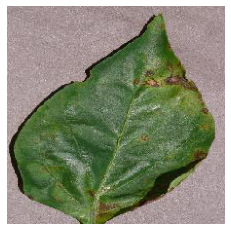

(1, 224, 224, 3)


In [0]:
 # image path
    #img_path = '/content/PlantVillage/Potato___Early_blight/ffef8a3b-3e8a-4c24-a27e-64c41708f7a0___RS_Early.B 7132.JPG' #Potato__Early_blight 
    img_path = '/content/PlantVillage/Pepper__bell___Bacterial_spot/ef82ea58-8cfe-4e8f-a935-2b4e143618b1___JR_B.Spot 9079.JPG'
    
# load a single image
    new_image = load_image(img_path)
    print(new_image.shape)

    # check prediction
    pred = model_new.predict(new_image)

In [0]:
pred.shape

(1, 15)

In [0]:
print(pred[0])
np.argmax(pred[0])

[7.1542576e-09 4.2128843e-09 3.4553096e-07 1.0351999e-09 9.3293051e-10
 2.1296866e-05 9.3642181e-01 4.3034647e-03 5.8575112e-02 6.4092234e-08
 3.0520539e-06 2.3714875e-08 2.1655495e-08 2.9035201e-07 6.7456416e-04]


6

In [0]:
class_names1=train_generator.class_indices.keys()
class_names1

dict_keys(['Pepper__bell___Bacterial_spot', 'Pepper__bell___healthy', 'Potato___Early_blight', 'Potato___Late_blight', 'Potato___healthy', 'Tomato_Bacterial_spot', 'Tomato_Early_blight', 'Tomato_Late_blight', 'Tomato_Leaf_Mold', 'Tomato_Septoria_leaf_spot', 'Tomato_Spider_mites_Two_spotted_spider_mite', 'Tomato__Target_Spot', 'Tomato__Tomato_YellowLeaf__Curl_Virus', 'Tomato__Tomato_mosaic_virus', 'Tomato_healthy'])

In [0]:
keys=np.fromiter(train_generator.class_indices.keys(), dtype= 'U48')

In [0]:
print(keys)

['Pepper__bell___Bacterial_spot' 'Pepper__bell___healthy'
 'Potato___Early_blight' 'Potato___Late_blight' 'Potato___healthy'
 'Tomato_Bacterial_spot' 'Tomato_Early_blight' 'Tomato_Late_blight'
 'Tomato_Leaf_Mold' 'Tomato_Septoria_leaf_spot'
 'Tomato_Spider_mites_Two_spotted_spider_mite' 'Tomato__Target_Spot'
 'Tomato__Tomato_YellowLeaf__Curl_Virus' 'Tomato__Tomato_mosaic_virus'
 'Tomato_healthy']


In [0]:
import numpy as np
predicted_id=np.argmax(pred, axis=1)


In [0]:
predicted_class_name = keys[predicted_id]
predicted_class_name

array(['Tomato_Early_blight'], dtype='<U48')